# Neural Networks for Handwritten Digit Recognition

Use a neural network to recognize the hand-written digits 0-9.This is a multiclass classification task where one of n choices is selected. Automated handwritten digit recognition is widely used today - from recognizing zip codes (postal codes) on mail envelopes to recognizing amounts written on bank checks.

<a name="1"></a>
## 1 - Import Packages 

In [164]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import linear, relu, sigmoid
import matplotlib.pyplot as plt

import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

from public_tests import * 

from autils import *
from lab_utils_softmax import plt_softmax
np.set_printoptions(precision=2)

<a name="4"></a>
## 2 - Neural Networks

<a name="4.2"></a>
### 2.1 Dataset
This is a subset of the MNIST handwritten digit dataset (http://yann.lecun.com/exdb/mnist/)</sub>

In [165]:
# load dataset
X, y = load_data()

#### 2.1.1 View the variables

Prints the first element in the variables `X` and `y`.  

In [166]:
print ('The first element of X is: ', X[0])

The first element of X is:  [ 0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  8.56e-06  1.94e-06 -7.37e-04
 -8.13e-03 -1.86e-02 -1.87e-02 -1.88e-02 -1.91e-02 -1.64e-02 -3.78e-03
  3.30e-04  1.28e-05  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  1.16e-04  1.20e-04 -1.40e-02 -2.85e-02  8.04e-02
  2.67e-01  2.74e-01  2.79e-01  2.74e-01  2.25e-0

In [167]:
print ('The first element of y is: ', y[0,0])
print ('The last element of y is: ', y[-1,0])

The first element of y is:  0
The last element of y is:  9


#### 2.1.2 Check the dimensions

In [168]:
print ('The shape of X is: ' + str(X.shape))
print ('The shape of y is: ' + str(y.shape))

The shape of X is: (5000, 400)
The shape of y is: (5000, 1)


#### 2.1.3 Visualizing the Data

- the code randomly selects 64 rows from `X`, maps each row back to a 20 pixel by 20 pixel grayscale image and displays the images together. 
- The label for each image is displayed above the image 

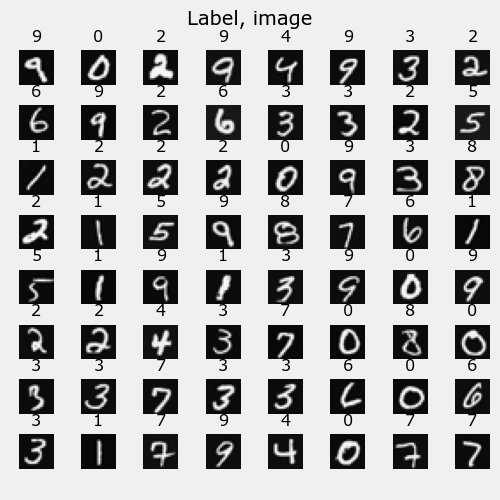

In [169]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# You do not need to modify anything in this cell

m, n = X.shape

fig, axes = plt.subplots(8,8, figsize=(5,5))
fig.tight_layout(pad=0.13,rect=[0, 0.03, 1, 0.91]) #[left, bottom, right, top]

#fig.tight_layout(pad=0.5)
for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)
    
    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = X[random_index].reshape((20,20)).T
    
    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')
    
    # Display the label above the image
    ax.set_title(y[random_index,0])
    ax.set_axis_off()
    fig.suptitle("Label, image", fontsize=14)

<a name="4.4"></a>
### 2.2 Tensorflow Model Implementation


Below, using Keras [Sequential model](https://keras.io/guides/sequential_model/) and [Dense Layer](https://keras.io/api/layers/core_layers/dense/) with a ReLU activation to construct the three layer network described above.

In [170]:
tf.random.set_seed(1234) # for consistent results
model = Sequential(
    [         
        tf.keras.Input(shape=(400,)),
        Dense(25, activation='relu'),
        Dense(15, activation='relu'),
        Dense(10, activation='linear')
    ], name = "my_model" 
)

In [171]:
model.summary()

Model: "my_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 25)                10025     
_________________________________________________________________
dense_22 (Dense)             (None, 15)                390       
_________________________________________________________________
dense_23 (Dense)             (None, 10)                160       
Total params: 10,575
Trainable params: 10,575
Non-trainable params: 0
_________________________________________________________________


Examine the weights to verify that tensorflow produced the same dimensions as we calculated above.

In [172]:
[layer1, layer2, layer3] = model.layers

In [173]:
#### Examine Weights shapes
W1,b1 = layer1.get_weights()
W2,b2 = layer2.get_weights()
W3,b3 = layer3.get_weights()
print(f"W1 shape = {W1.shape}, b1 shape = {b1.shape}")
print(f"W2 shape = {W2.shape}, b2 shape = {b2.shape}")
print(f"W3 shape = {W3.shape}, b3 shape = {b3.shape}")

W1 shape = (400, 25), b1 shape = (25,)
W2 shape = (25, 15), b2 shape = (15,)
W3 shape = (15, 10), b3 shape = (10,)


* defines a loss function: `SparseCategoricalCrossentropy` and indicates the softmax should be included with the  loss calculation by adding `from_logits=True`)
* defines an optimizer: Adaptive Moment

In [174]:
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
)

history = model.fit(
    X,y,epochs=50
)

Epoch 1/50
157/157 [==============================] - 0s 735us/step - loss: 1.7094
Epoch 2/50
157/157 [==============================] - 0s 716us/step - loss: 0.7480
Epoch 3/50
157/157 [==============================] - 0s 710us/step - loss: 0.4428
Epoch 4/50
157/157 [==============================] - 0s 722us/step - loss: 0.3463
Epoch 5/50
157/157 [==============================] - 0s 729us/step - loss: 0.2977
Epoch 6/50
157/157 [==============================] - 0s 735us/step - loss: 0.2630
Epoch 7/50
157/157 [==============================] - 0s 742us/step - loss: 0.2361
Epoch 8/50
157/157 [==============================] - 0s 735us/step - loss: 0.2131
Epoch 9/50
157/157 [==============================] - 0s 729us/step - loss: 0.2004
Epoch 10/50
157/157 [==============================] - 0s 722us/step - loss: 0.1805
Epoch 11/50
157/157 [==============================] - 0s 729us/step - loss: 0.1692
Epoch 12/50
157/157 [==============================] - 0s 722us/step - loss: 0.1580
E

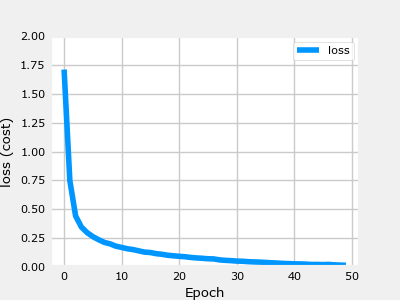

In [175]:
plot_loss_tf(history)

## 3 - Prediction 

In [176]:
prediction_p = tf.nn.softmax(prediction)

print(f" predicting Probability vector: \n{prediction_p}")
print(f"Total of predictions: {np.sum(prediction_p):0.3f}")

 predicting Probability vector: 
[[9.67e-01 1.09e-08 3.83e-04 4.70e-05 1.99e-10 3.05e-02 8.76e-07 2.24e-03
  1.56e-04 3.57e-05]]
Total of predictions: 1.000


In [177]:
yhat = np.argmax(prediction_p)  # To return the index of the largest probability.

print(f"np.argmax(prediction_p): {yhat}")

np.argmax(prediction_p): 0


Compare the predictions vs the labels for a random sample of 64 digits.

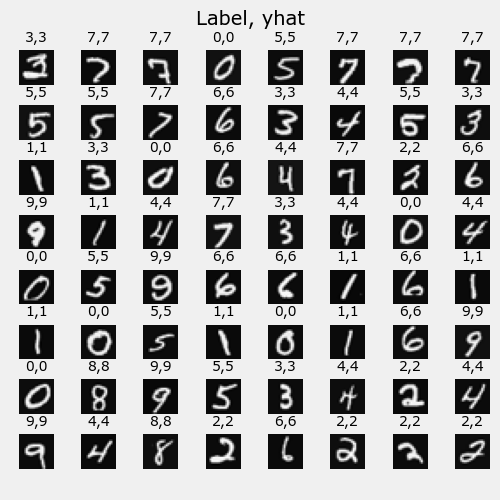

In [178]:
m, n = X.shape

fig, axes = plt.subplots(8,8, figsize=(5,5))
fig.tight_layout(pad=0.13,rect=[0, 0.03, 1, 0.91]) #[left, bottom, right, top]
widgvis(fig)
for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)
    
    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = X[random_index].reshape((20,20)).T
    
    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')
    
    # Predict using the Neural Network
    prediction = model.predict(X[random_index].reshape(1,400))
    prediction_p = tf.nn.softmax(prediction)
    yhat = np.argmax(prediction_p)
    
    # Display the label above the image
    ax.set_title(f"{y[random_index,0]},{yhat}",fontsize=10)
    ax.set_axis_off()
fig.suptitle("Label, yhat", fontsize=14)
plt.show()

Look at some of the errors. 

8 errors out of 5000 images


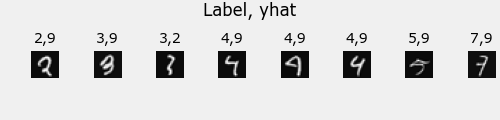

In [179]:
print( f"{display_errors(model,X,y)} errors out of {len(X)} images")